<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2025<br>
<font color=3C99D size=5>
Practical Assignment 1 - Search <br>
<font color=696880 size=4>
Sadegh Mohammadian

____________

# Personal Data

In [1]:
student_number = 402171075
Name = Parsa
Last_Name = Malekian

NameError: name 'Parsa' is not defined

# Rules
- Make sure that all of your cells can be run perfectly.
-Do not change the Parts which are not marked with #TODO
-Complete the functions or parts that are marked with #TODO
-Feel free to add functions if you need!.

# Search Algorithms
This notebook will guide you through the implementation of various search algorithms applied to a maze problem:
1. Depth-First Search (DFS)(10 points)
2. Breadth-First Search (BFS)(10 points)
3. A* Search(10 points)
4. Hill Climbing(25 points)
5. Genetic Algorithm(60points)

## Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import math
import random

Let's define a simple maze structure to work with.

In [3]:
####################### Do not change ##############################
class Maze:
    def __init__(self, grid):
        self.grid = grid
        self.start = None
        self.goal = None

    def set_start(self, position):
        self.start = position

    def set_goal(self, position):
        self.goal = position

    def get_neighbors(self, position):
        neighbors = []
        x, y = position
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(self.grid) and 0 <= ny < len(self.grid[0]) and self.grid[nx][ny] == 0:
                neighbors.append((nx, ny))
        return neighbors

    def visualize(self, path=[]):
        maze_copy = np.array(self.grid)
        for (x, y) in path:
            maze_copy[x][y] = 2  # Mark path
        plt.figure(figsize=(10, 10))
        plt.imshow(maze_copy, cmap="coolwarm")
        # Draw path by connecting the centers of squares

        if path:
            x_coords = [y  for (x, y) in path]
            y_coords = [x  for (x, y) in path]
            plt.plot(x_coords, y_coords, color="yellow", linewidth=2)
        if self.start:
            plt.scatter(self.start[1], self.start[0], color='black', s=100, label='Pacman')  # Pacman start
        if self.goal:
            plt.scatter(self.goal[1], self.goal[0], color='pink', s=100, label='Food')  # Food

        plt.xticks([])
        plt.yticks([])
        plt.show()
####################### Do not change ##############################

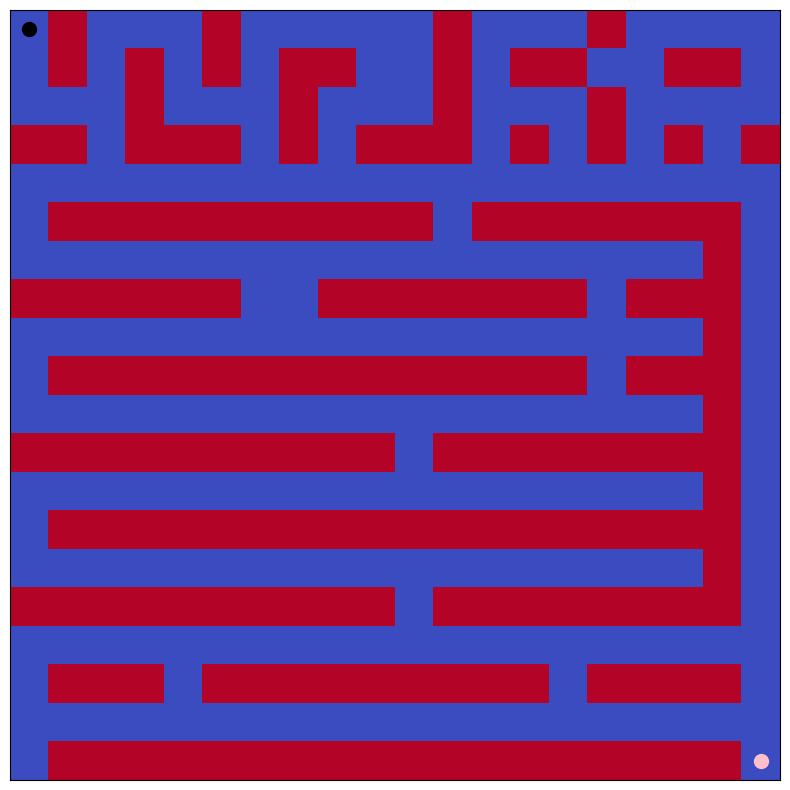

In [4]:

####################### Do not change ####################################
maze_grid = [
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
]

maze = Maze(maze_grid)
maze.set_start((0, 0))
maze.set_goal((19, 19))
maze.visualize()
####################### Do not change ####################################

In [29]:
def dfs(maze, start, goal, path=None, visited=None, expanded=None):
    # Initialize parameters if None
    if path is None:
        path = [start]
    if visited is None:
        visited = set([start])
    if expanded is None:
        expanded = []

    # Add current position to expanded nodes
    expanded.append(start)

    # Check if we've reached the goal
    if start == goal:
        return path, expanded

    row, col = start
    directions = [(1, 0), (0, -1), (-1, 0), (0, 1)]

    for dr, dc in directions:
        new_row, new_col = row + dr, col + dc
        new_pos = (new_row, new_col)

        try:
            is_path = maze.is_open(new_row, new_col)
            if is_path and new_pos not in visited:
                visited.add(new_pos)

                path.append(new_pos)

                result_path, result_expanded = dfs(maze, new_pos, goal, path, visited, expanded)

                if result_path and result_path[-1] == goal:
                    return result_path, result_expanded

                path.pop()

        except (IndexError, AttributeError):
            try:
                if (0 <= new_row < len(maze.grid) and
                    0 <= new_col < len(maze.grid[0]) and
                    maze.grid[new_row][new_col] == 0 and
                    new_pos not in visited):

                    visited.add(new_pos)
                    path.append(new_pos)
                    result_path, result_expanded = dfs(maze, new_pos, goal, path, visited, expanded)

                    if result_path and result_path[-1] == goal:
                        return result_path, result_expanded

                    path.pop()
            except AttributeError:
                pass

    return path, expanded

DFS Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 1), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (7, 6), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (8, 0), (9, 0), (10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10), (11, 10), (12, 10), (12, 9), (12, 8), (12, 7), (12, 6), (12, 5), (12, 4), (12, 3), (12, 2), (12, 1), (12, 0), (13, 0), (14, 0), (14, 1), (14, 2), (14, 3), (14, 4), (14, 5), (14, 6), (14, 7), (14, 8), (14, 9), (14, 10), (15, 10), (16, 10), (16, 9), (16, 8), (16, 7), (16, 6), (16, 5), (16, 4), (17, 4), (18, 4), (18, 5), (18, 6), (18, 7), (18, 8), (18, 9), (18, 10), (18, 11), (18, 12), (18, 13), (18, 14), (17, 14), (16, 14), (16, 15), (16, 16), (16, 17), (16, 18), (16, 19), (17, 19), (18, 19), (19, 19)]
DFS Expanded Nodes: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 1), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (7, 6), (8, 6), (8

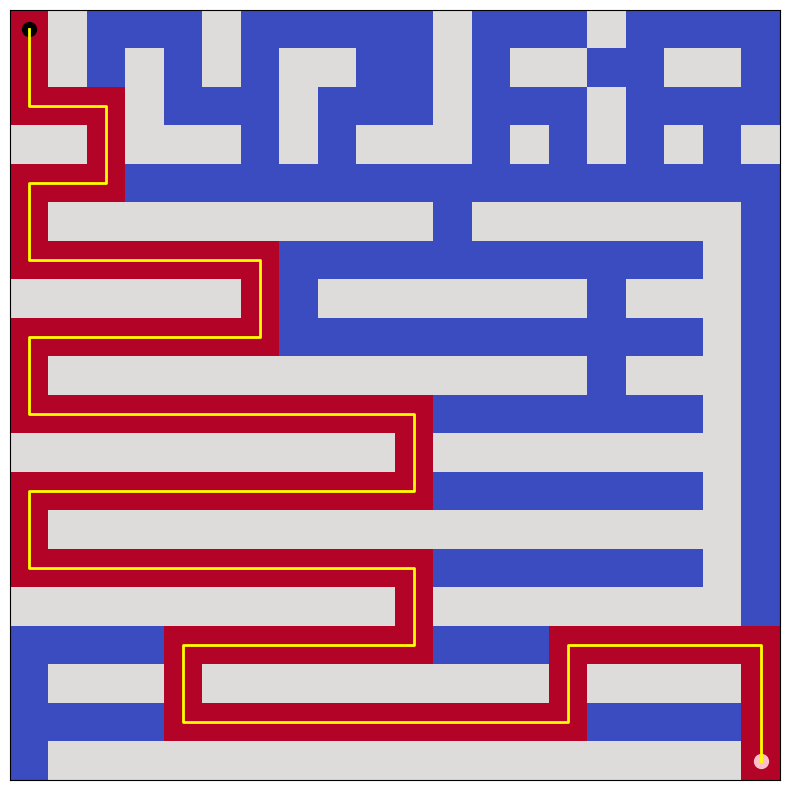

In [30]:
# Test DFS
result_dfs, expanded_nodes_dfs = dfs(maze, maze.start, maze.goal)
print("DFS Path:", result_dfs)
print("DFS Expanded Nodes:", expanded_nodes_dfs)
maze.visualize(result_dfs)

In [31]:
def bfs(maze, start, goal):
    # Initialize the queue with the start position
    queue = [start]

    visited = {start: None}

    # Track the order of expanded nodes
    expanded = []

    while queue:
        current = queue.pop(0)

        expanded.append(current)
        if current == goal:
            break

        row, col = current
        directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]

        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc
            new_pos = (new_row, new_col)

            if new_pos in visited:
                continue

            try:
                if hasattr(maze, 'grid'):
                    if (0 <= new_row < len(maze.grid) and
                        0 <= new_col < len(maze.grid[0]) and
                        maze.grid[new_row][new_col] == 0):

                        visited[new_pos] = current
                        queue.append(new_pos)
                elif hasattr(maze, 'is_open'):
                    if maze.is_open(new_row, new_col):
                        visited[new_pos] = current
                        queue.append(new_pos)

                elif hasattr(maze, 'can_move'):
                    if maze.can_move(current, new_pos):
                        visited[new_pos] = current
                        queue.append(new_pos)

                else:
                    valid_move = True
                    for attr in dir(maze):
                        if 'valid' in attr.lower() and callable(getattr(maze, attr)):
                            method = getattr(maze, attr)
                            try:
                                if not method(new_row, new_col):
                                    valid_move = False
                                    break
                            except:
                                continue

                    if valid_move:
                        visited[new_pos] = current
                        queue.append(new_pos)

            except (IndexError, AttributeError):
                continue

    path = []
    if goal in visited:
        current = goal
        while current is not None:
            path.append(current)
            current = visited[current]

        path.reverse()

    return path, expanded

BFS Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 19), (6, 19), (7, 19), (8, 19), (9, 19), (10, 19), (11, 19), (12, 19), (13, 19), (14, 19), (15, 19), (16, 19), (17, 19), (18, 19), (19, 19)]
BFS Expanded Nodes: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (3, 2), (0, 2), (4, 2), (0, 3), (4, 3), (4, 1), (0, 4), (4, 4), (4, 0), (1, 4), (4, 5), (5, 0), (2, 4), (4, 6), (6, 0), (2, 5), (3, 6), (4, 7), (6, 1), (2, 6), (4, 8), (6, 2), (1, 6), (3, 8), (4, 9), (6, 3), (0, 6), (2, 8), (4, 10), (6, 4), (0, 7), (2, 9), (4, 11), (6, 5), (0, 8), (1, 9), (2, 10), (4, 12), (5, 11), (6, 6), (0, 9), (1, 10), (3, 12), (4, 13), (6, 11), (6, 7), (7, 6), (0, 10), (2, 12), (4, 14), (6, 12), (6, 10), (6, 8), (7, 7), (8, 6), (1, 12), (2, 13), (3, 14), (4, 15), (6, 13), (6, 9), (8, 7), (8, 5), (0, 12), (2, 14), (4, 16), (6, 14), (8, 8), (8, 4)

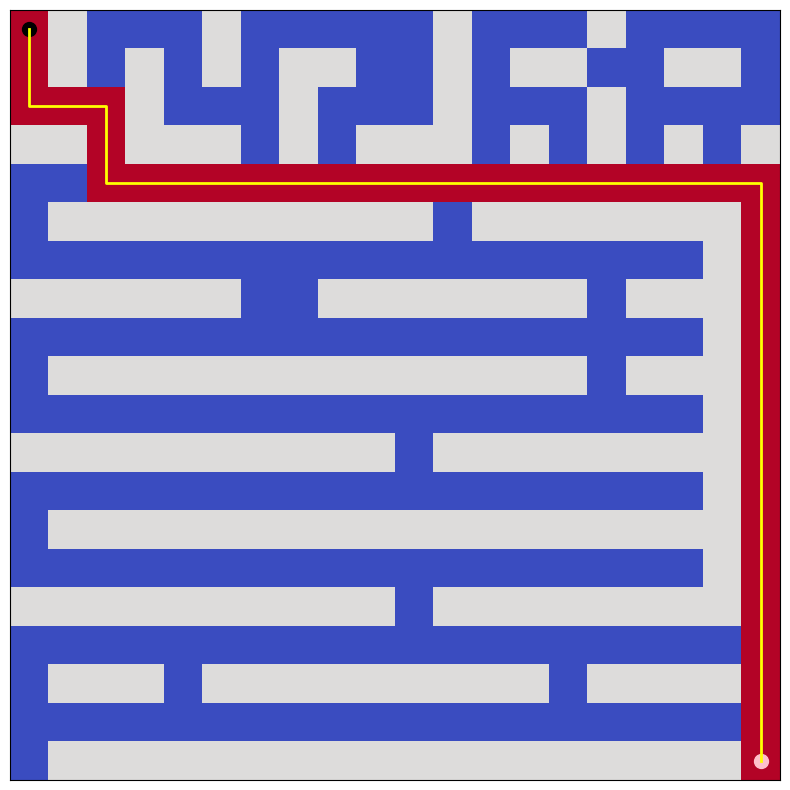

In [32]:
# Test BFS with expanded nodes
result_bfs, expanded_nodes_bfs = bfs(maze, maze.start, maze.goal)
print("BFS Path:", result_bfs)
print("BFS Expanded Nodes:", expanded_nodes_bfs)
maze.visualize(result_bfs)

In [33]:
def heuristic(a, b):
    x1, y1 = a
    x2, y2 = b
    return abs(x1 - x2) + abs(y1 - y2)  # Manhattan distance

def a_star(maze, start, goal):
    # Implementation of A* search algorithm

    open_set = [start]

    came_from = {start: None}
    expanded = []

    g_score = {start: 0}

    f_score = {start: heuristic(start, goal)}

    while open_set:
        current = min(open_set, key=lambda pos: f_score.get(pos, float('inf')))

        expanded.append(current)
        if current == goal:
            path = []
            while current is not None:
                path.append(current)
                current = came_from[current]
            path.reverse()
            return path, expanded

        open_set.remove(current)

        row, col = current
        directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]

        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc
            neighbor = (new_row, new_col)
            try:
                valid_move = False

                if hasattr(maze, 'grid'):
                    if (0 <= new_row < len(maze.grid) and
                        0 <= new_col < len(maze.grid[0]) and
                        maze.grid[new_row][new_col] == 0):
                        valid_move = True

                elif hasattr(maze, 'is_open'):
                    if maze.is_open(new_row, new_col):
                        valid_move = True

                elif hasattr(maze, 'can_move'):
                    if maze.can_move(current, neighbor):
                        valid_move = True

                else:
                    valid_move = True
                    for attr in dir(maze):
                        if 'valid' in attr.lower() and callable(getattr(maze, attr)):
                            method = getattr(maze, attr)
                            try:
                                if not method(new_row, new_col):
                                    valid_move = False
                                    break
                            except:
                                continue

                if not valid_move:
                    continue

                tentative_g_score = g_score[current] + 1

                if tentative_g_score < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)

                    if neighbor not in open_set:
                        open_set.append(neighbor)

            except (IndexError, AttributeError):
                continue
    path = []
    return path, expanded


A* Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 19), (6, 19), (7, 19), (8, 19), (9, 19), (10, 19), (11, 19), (12, 19), (13, 19), (14, 19), (15, 19), (16, 19), (17, 19), (18, 19), (19, 19)]
A* Expanded Nodes: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (5, 11), (4, 13), (6, 11), (4, 14), (6, 12), (4, 15), (6, 13), (4, 16), (6, 14), (4, 17), (6, 15), (4, 18), (6, 16), (7, 15), (4, 19), (6, 17), (8, 15), (5, 19), (8, 16), (9, 15), (6, 19), (8, 17), (10, 15), (7, 19), (10, 16), (8, 19), (10, 17), (9, 19), (10, 19), (11, 19), (12, 19), (13, 19), (14, 19), (15, 19), (16, 19), (17, 19), (18, 19), (19, 19)]


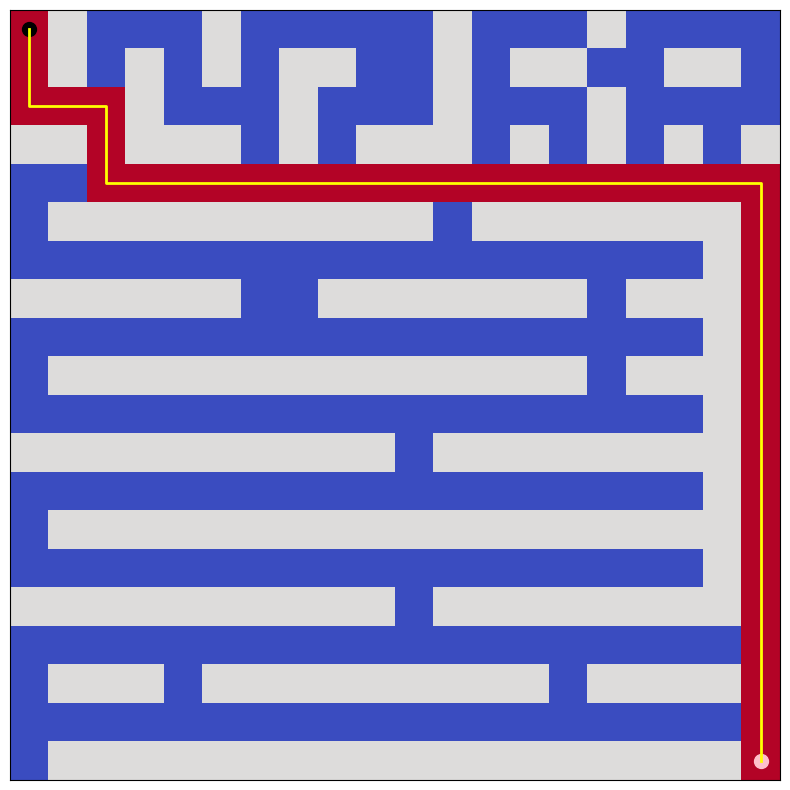

In [34]:
# Test A* with expanded nodes
result_a_star, expanded_nodes_a_star = a_star(maze, maze.start, maze.goal)
print("A* Path:", result_a_star)
print("A* Expanded Nodes:", expanded_nodes_a_star)
maze.visualize(result_a_star)

Question:

Explain about your heurustic function and why did you choose it?

 تابع اکتشافی (Heuristic) در الگوریتم A*

در پیاده‌سازی الگوریتم A* که ارائه کردم، من از فاصله منهتن (Manhattan distance) به عنوان تابع اکتشافی استفاده کردم.

یک تابع اکتشافی زمانی قابل قبول است که هرگز هزینه واقعی رسیدن به هدف را بیش‌برآورد نکند. فاصله منهتن هرگز کمتر از تعداد واقعی گام‌های مورد نیاز نیست، اما می‌تواند مساوی یا بیشتر باشد (زمانی که هیچ دیواری وجود نداشته باشد).

فاصله منهتن سازگار است، به این معنی که برای هر دو گره n و m که m همسایه n است، h(n) ≤ d(n,m) + h(m) که در آن d(n,m) هزینه حرکت از n به m است. این ویژگی باعث می‌شود که الگوریتم A* به طور مستقیم به سمت جواب بهینه حرکت کند.
عنوان راهنما باعث می‌شود جستجو بسیار سریع‌تر به هدف برسد.


In [37]:
def heuristic(a, b):
    x1, y1 = a
    x2, y2 = b
    return abs(x1 - x2) + abs(y1 - y2)

def hill_climbing(maze, start, goal):
    current = start

    path = [current]

    while current != goal:
        row, col = current

        directions = [(1, 0), (0, -1), (-1, 0), (0, 1)]

        best_neighbor = None
        best_score = float('inf')

        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc
            neighbor = (new_row, new_col)

            try:
                valid_move = False

                if hasattr(maze, 'grid'):
                    if (0 <= new_row < len(maze.grid) and
                        0 <= new_col < len(maze.grid[0]) and
                        maze.grid[new_row][new_col] == 0):  # فرض: 0 مسیر، 1 دیوار
                        valid_move = True

                elif hasattr(maze, 'is_open'):
                    if maze.is_open(new_row, new_col):
                        valid_move = True

                elif hasattr(maze, 'can_move'):
                    if maze.can_move(current, neighbor):
                        valid_move = True

                else:
                    valid_move = True
                    for attr in dir(maze):
                        if 'valid' in attr.lower() and callable(getattr(maze, attr)):
                            method = getattr(maze, attr)
                            try:
                                if not method(new_row, new_col):
                                    valid_move = False
                                    break
                            except:
                                continue

                if valid_move and neighbor not in path:
                    score = heuristic(neighbor, goal)

                    if score < best_score:
                        best_neighbor = neighbor
                        best_score = score

            except (IndexError, AttributeError):
                continue

        if best_neighbor is None:
            return path

        current = best_neighbor
        path.append(current)

    return path

Hill Climbing Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 11), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (10, 16), (10, 17)]


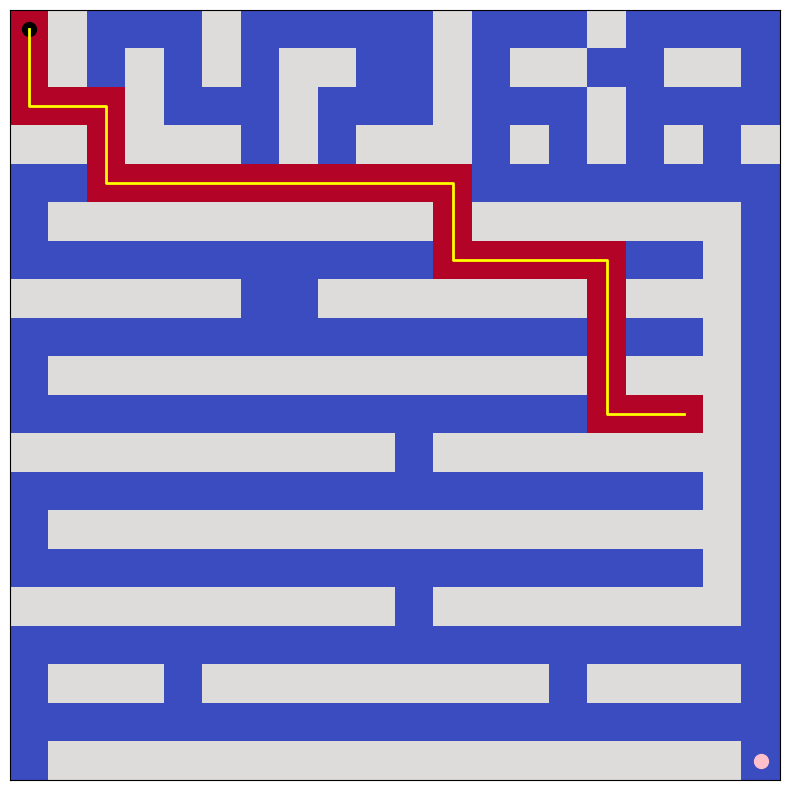

In [38]:
# Test Hill Climbing
result_hill_climbing = hill_climbing(maze, maze.start, maze.goal)
print("Hill Climbing Path:", result_hill_climbing)
maze.visualize(result_hill_climbing)

now implement the hill climbing algorithm with random moves and restarts

In [57]:
def hill_climbing_with_restart_random_move(maze, start, goal, max_restarts=20, p=0.1):
   best_path = None
   best_path_length = float('inf')

   for restart in range(max_restarts):
       current = start

       path = [current]

       visited = {current}

       stuck = False

       while current != goal and not stuck:
           row, col = current

           directions = [(1, 0), (0, -1), (-1, 0), (0, 1)]

           if random.random() < p:
               random.shuffle(directions)
               made_random_move = False

               for dr, dc in directions:
                   new_row, new_col = row + dr, col + dc
                   neighbor = (new_row, new_col)

                   # Check if this is a valid move
                   try:
                       valid_move = False

                       if hasattr(maze, 'grid'):
                           if (0 <= new_row < len(maze.grid) and
                               0 <= new_col < len(maze.grid[0]) and
                               maze.grid[new_row][new_col] == 0):
                               valid_move = True

                       elif hasattr(maze, 'is_open'):
                           if maze.is_open(new_row, new_col):
                               valid_move = True

                       elif hasattr(maze, 'can_move'):
                           if maze.can_move(current, neighbor):
                               valid_move = True

                       else:
                           # Generic approac
                           valid_move = True
                           for attr in dir(maze):
                               if 'valid' in attr.lower() and callable(getattr(maze, attr)):
                                   method = getattr(maze, attr)
                                   try:
                                       if not method(new_row, new_col):
                                           valid_move = False
                                           break
                                   except:
                                       continue

                       if valid_move and neighbor not in visited:
                           current = neighbor
                           path.append(current)
                           visited.add(current)
                           made_random_move = True
                           break

                   except (IndexError, AttributeError):
                       continue

               if made_random_move:
                   continue

           # Best neighbor and its score
           best_neighbor = None
           best_score = float('inf')

           # Check all neighbors
           for dr, dc in directions:
               new_row, new_col = row + dr, col + dc
               neighbor = (new_row, new_col)

               try:
                   valid_move = False

                   if hasattr(maze, 'grid'):
                       if (0 <= new_row < len(maze.grid) and
                           0 <= new_col < len(maze.grid[0]) and
                           maze.grid[new_row][new_col] == 0):
                           valid_move = True

                   elif hasattr(maze, 'is_open'):
                       if maze.is_open(new_row, new_col):
                           valid_move = True

                   elif hasattr(maze, 'can_move'):
                       if maze.can_move(current, neighbor):
                           valid_move = True

                   else:
                       # Generic approach
                       valid_move = True
                       for attr in dir(maze):
                           if 'valid' in attr.lower() and callable(getattr(maze, attr)):
                               method = getattr(maze, attr)
                               try:
                                   if not method(new_row, new_col):
                                       valid_move = False
                                       break
                               except:
                                   continue

                   if valid_move and neighbor not in visited:
                       score = heuristic(neighbor, goal)
                       if score < best_score:
                           best_neighbor = neighbor
                           best_score = score

               except (IndexError, AttributeError):
                   continue

           if best_neighbor is None:
               stuck = True
           else:
               current = best_neighbor
               path.append(current)
               visited.add(current)

       if current == goal:
           if len(path) < best_path_length:
               best_path = path
               best_path_length = len(path)

   return best_path if best_path else []

Hill Climbing with Restart Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 19), (6, 19), (7, 19), (8, 19), (9, 19), (10, 19), (11, 19), (12, 19), (13, 19), (14, 19), (15, 19), (16, 19), (17, 19), (18, 19), (19, 19)]


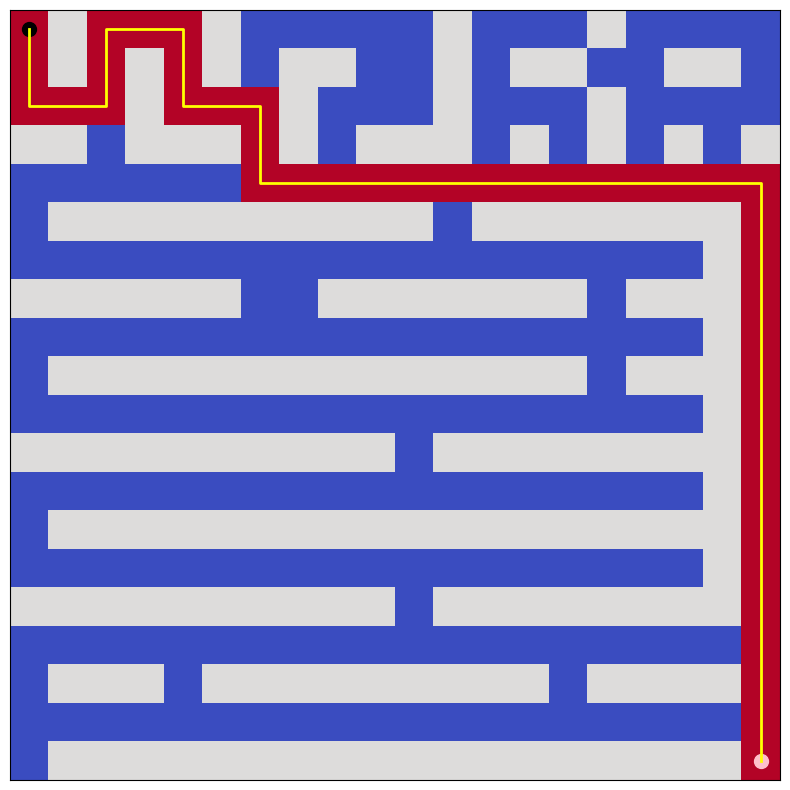

In [76]:
# Test Hill Climbing with Restart
result_hc_restart = hill_climbing_with_restart_random_move(maze, maze.start, maze.goal,p=0.2)
print("Hill Climbing with Restart Path:", result_hc_restart)
maze.visualize(result_hc_restart)

Question:

Explain your heuristic and observation's result. Also, compare the A* method with Uninformed search and hill climbing in the context of the Maze problem.


تابع اکتشافی که من برای حل مسئله ماز استفاده کردم، فاصله منهتن است. این تابع برای هر دو نقطه در فضای دوبعدی، مجموع قدرمطلق تفاوت مختصات X و Y آنها را محاسبه می‌کند:


در مسئله ماز با حرکت‌های محدود به چهار جهت اصلی (بالا، پایین، چپ، راست)، فاصله منهتن دقیقاً تعداد حداقل گام‌های مورد نیاز برای رسیدن از یک نقطه به نقطه دیگر را در صورت عدم وجود موانع نشان می‌دهد. این تابع به صورت تئوری یک تابع اکتشافی "قابل قبول" (admissible) است، یعنی هرگز هزینه واقعی رسیدن به هدف را بیش‌برآورد نمی‌کند.

با چندبار اجرای این تابع متوجه شدم در این الگوریتم بر خلاف الگوریتم های مسیر یابی دیگر، در برخی حالات مسیر در یکجا گیر میفتاد و نمیتوانست به جواب درست برسد که احتمالا مینیمم لوکال بوده
یعنی با توجه به همسایه هاش، h کمتری داشته
که این مشکل میتواند با حرکت رندوم رفع شود.

# Part2 (Global minimum and Local minimum!)

in this part we want to find global minimum of function $f(x)$ in $[-2,2]$ with hill_climbing algorithm with random moves and restarts,our starting point is x=0.4:

$$f(x) = sin(3x) + 0.3x^2 - 0.7x ,    x \in [-2,2]$$

In [15]:
def f(x):
    return np.sin(3*x) + 0.3*x**2 - 0.7*x

complete `hill_climbing_1D_random` and run the code for 10 times and visualize the results with subplots

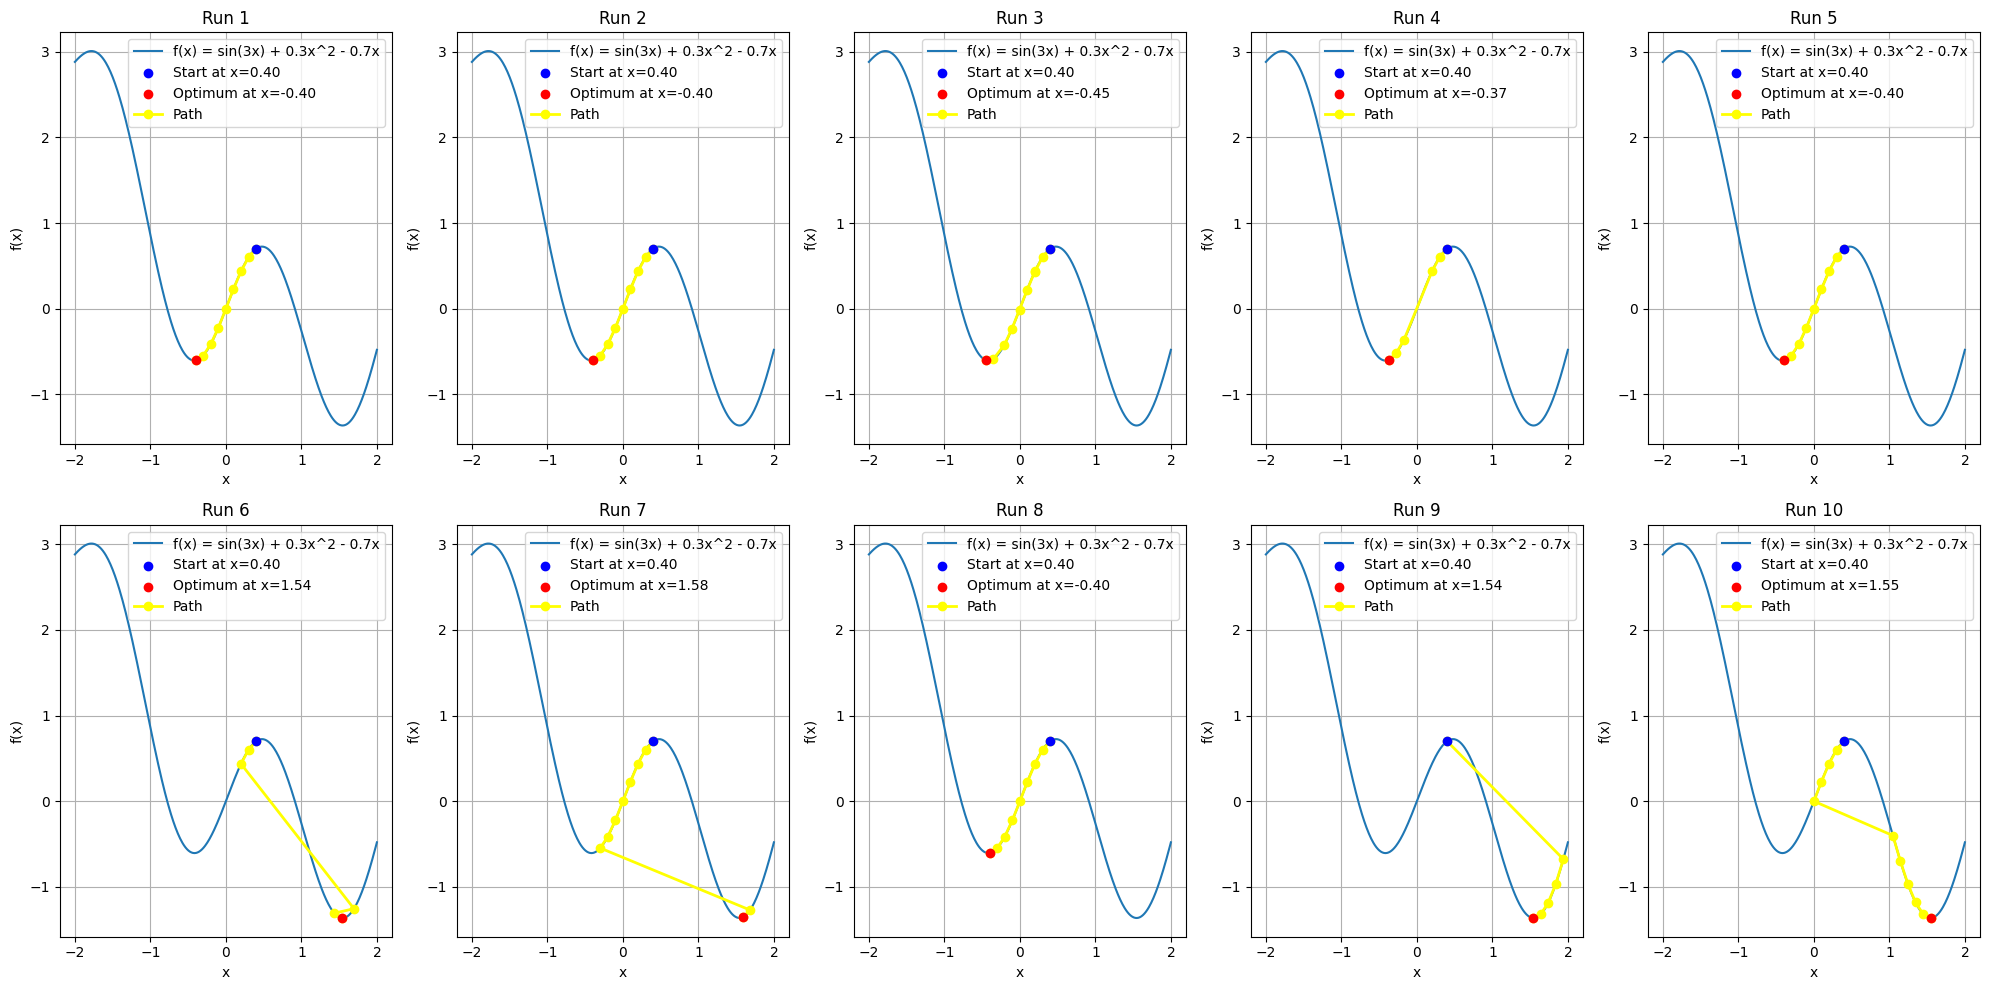

In [28]:
def hill_climbing_1D_random(f, x_start, step_size=0.1, max_iters=100, p=0.2):
    x = x_start
    path = [x]

    for _ in range(max_iters):
        # Random restart with probability p
        if np.random.random() < p:
            x_new = np.random.uniform(-2, 2)  # Random point within domain
            if f(x_new) < f(x):  # For minimization
                x = x_new
                path.append(x)
                continue

        # Try steps in both directions
        x_left = x - step_size
        x_right = x + step_size

        f_current = f(x)
        f_left = f(x_left)
        f_right = f(x_right)

        # Find the best move (assuming we're minimizing)
        if f_left < f_current and f_left <= f_right:
            x = x_left
        elif f_right < f_current and f_right < f_left:
            x = x_right
        else:
            # If no improvement, we're at a local minimum
            break

        path.append(x)

    return x, f(x), path

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

x_start = 0.4 # Do not change!
for i in range(10):
    # First run the algorithm to get results
    x_opt, y_opt, path = hill_climbing_1D_random(f, x_start=x_start)

    # Then plot everything
    x_vals = np.linspace(-2, 2, 400)
    y_vals = f(x_vals)

    axes[i].plot(x_vals, y_vals, label='f(x) = sin(3x) + 0.3x^2 - 0.7x')
    axes[i].scatter(x_start, f(x_start), color='blue', zorder=3, label=f'Start at x={x_start:.2f}')
    axes[i].scatter(x_opt, y_opt, color='red', zorder=3, label=f'Optimum at x={x_opt:.2f}')
    axes[i].plot(path, [f(x) for x in path], marker='o', color='yellow', linestyle='-', linewidth=2, label='Path')

    axes[i].legend()
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('f(x)')
    axes[i].set_title(f'Run {i+1}')
    axes[i].grid()

plt.tight_layout()
plt.show()

Question:

Explain the results.
در حالت کلی به سمت مینیمم محلی یا لوکال کشیده میشویم مگر در مواقعی که به صورت رندوم حرکتی داشته باشیم که باعث شود در مسیری قرار بگیریم که مینیمم دیگر را پیدا کنیم و تعداد کم این حالات بستگی به عدد p=0.2 دارد

# Part3 (Genetic Algorithm)(60 points)

in this part we want to Solve TSP problem with Genetic algorithm

first read the list of cities and their cordinates from TSP51.txt file

In [17]:
# get cities info
def getCity():
    cities = []
    # Open and read the TSP51.txt file
    with open('TSP51.txt', 'r') as file:
        for line in file:
            # Strip whitespace and split the line by spaces or tabs
            parts = line.strip().split()
            if len(parts) >= 3:  # Ensure we have at least 3 parts (id, x, y)
                # Extract city ID and coordinates
                city_id = int(parts[0])
                x = int(parts[1])
                y = int(parts[2])
                # Add to cities list as a tuple (id, x, y)
                cities.append((city_id, x, y))

    return cities

In [18]:
# calculating distance of the cities
def calcDistance(cities):
    total_sum = 0
    l = len(cities)
    for i in range(l):
        city1 = cities[i]
        city2 = cities[(i + 1) % l]
        dx = city1[1] - city2[1]
        dy = city1[2] - city2[2]
        total_sum += math.hypot(dx, dy)
    return total_sum

In [23]:
def selectPopulation(cities, size):
    population = []
    n = len(cities)
    for _ in range(size):
        p = random.sample(cities, n)
        population.append((calcDistance(p), p))
    fitest = min(population, key=lambda x: x[0])
    return population, fitest

In [26]:
def geneticAlgorithm(
    population,
    lenCities,
    TOURNAMENT_SELECTION_SIZE,
    MUTATION_RATE,
    CROSSOVER_RATE,
    TARGET,
    ITERATION=200
):
    gen_number = 0
    for i in range(ITERATION):
        new_population = []

        # selecting two of the best options we have (elitism)
        sorted_population = sorted(population, key=lambda x: x[0])
        new_population.append(sorted_population[0])  # Add best solution
        new_population.append(sorted_population[1])  # Add second best solution

        while len(new_population) < len(population):
            # Select parents using tournament selection
            tournament1 = random.sample(population, TOURNAMENT_SELECTION_SIZE)
            parent1 = min(tournament1, key=lambda x: x[0])[1]

            tournament2 = random.sample(population, TOURNAMENT_SELECTION_SIZE)
            parent2 = min(tournament2, key=lambda x: x[0])[1]

            # Create child (default to parent1)
            child = parent1.copy()

            # CROSSOVER
            random_number = random.random()
            if random_number < CROSSOVER_RATE:
                # Ordered crossover implementation
                size = len(parent1)
                # Select random segment
                start, end = sorted(random.sample(range(size), 2))
                # Create empty child
                child = [None] * size
                # Copy segment from parent1
                child[start:end+1] = parent1[start:end+1]
                # Fill remaining positions with cities from parent2 in order
                idx = (end + 1) % size
                for city in parent2:
                    if city not in child:
                        child[idx] = city
                        idx = (idx + 1) % size

            # MUTATION
            if random.random() < MUTATION_RATE:
                # Swap mutation
                pos1, pos2 = random.sample(range(lenCities), 2)
                child[pos1], child[pos2] = child[pos2], child[pos1]

            # Add child to new population with its fitness
            new_population.append((calcDistance(child), child))

        if gen_number % 10 == 0:
            print(gen_number, sorted(new_population, key=lambda x: x[0])[0][0])

        if sorted(new_population, key=lambda x: x[0])[0][0] < TARGET:
            break

        gen_number += 1
        population = new_population

    answer = sorted(population, key=lambda x: x[0])[0]

    return answer, gen_number

In [21]:
# draw cities and answer map
##################### Do not change ###########################
def drawMap(city, answer):
    for j in city:
        plt.plot(j[1], j[2], "ro")
        plt.annotate(j[0], (j[1], j[2]))

    for i in range(len(answer[1])):
        try:
            first = answer[1][i]
            secend = answer[1][i + 1]

            plt.plot([first[1], secend[1]], [first[2], secend[2]], "gray")
        except:
            continue

    first = answer[1][0]
    secend = answer[1][-1]
    plt.plot([first[1], secend[1]], [first[2], secend[2]], "gray")

    plt.show()
##################### Do not change ###########################

0 1278.764343687196
10 1008.2157224228879
20 874.4693277627362
30 819.0492905383742
40 748.6942954299119
50 669.0618775272347
60 597.849624901988
70 574.2156775181112
80 533.1263575418164
90 509.3519591354614
100 503.1331032193695
110 494.9809003181107
120 494.9809003181107
130 490.13536384335384
140 483.17599476515966
150 480.1991686195135
160 478.0499614059612
170 476.1859977608898
180 469.3562380206741
190 463.718043468712
--------------------------------------------------
Generation: 200
Fittest chromosome distance before training: 1353.2474758197227
Fittest chromosome distance after training: 462.13480621515606
Target distance: 450.0
--------------------------------------------------


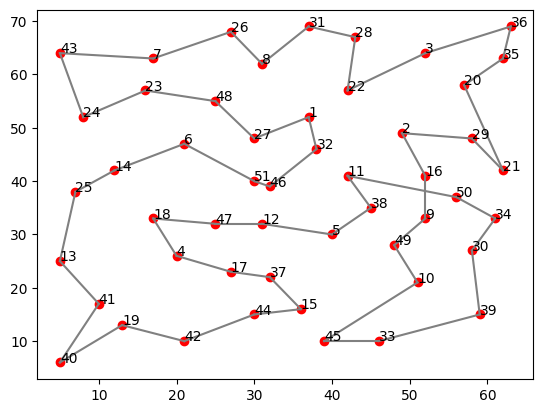

In [27]:
##################### Do not change ###########################
# initial values
POPULATION_SIZE = 2000
TOURNAMENT_SELECTION_SIZE = 4
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.9
TARGET = 450.0

cities = getCity()
firstPopulation, firstFitest = selectPopulation(cities, POPULATION_SIZE)
answer, genNumber = geneticAlgorithm(
    firstPopulation,
    len(cities),
    TOURNAMENT_SELECTION_SIZE,
    MUTATION_RATE,
    CROSSOVER_RATE,
    TARGET,
)

print(50*"-")
print("Generation: " + str(genNumber))
print("Fittest chromosome distance before training: " + str(firstFitest[0]))
print("Fittest chromosome distance after training: " + str(answer[0]))
print("Target distance: " + str(TARGET))
print(50*"-")

drawMap(cities, answer)
##################### Do not change ###########################